# Final Exam

## Conceptual questions

1.B 2.D 3.C 4.D

5.

a. The critical values are at different distances from the mean of zero. Since for all 3 series the lagged values are within the limits, all 3 are white noises.

b.Because the data sets have different number of observations. The more observations are in a data set representing white noise the less noise appears in the correlation estimations (spikes). The limits are calculated as ±2/√N. Therefore, the range for the 3 series are:
30 = ±0.365;        300 = ±0.115;         1200 = ±0.058

Therefore the critical values for bigger data sets can be smaller in order to check if the data is not white noise. 

## Application questions

In [ ]:
!pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.13.4 requires numpy<1.23,>=1.21.0, but you have numpy 1.23.5 which is incompatible.
pycaret 3.0.0rc4 requires numpy<1.23,>=1.21, but you have numpy 1.23.5 which is incompatible.


In [ ]:
!pip install --force-reinstall numpy==1.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install matplotlib==3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --force-reinstall xgboost==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xgboost-1.1.0-py3-none-manylinux2010_x86_64.whl (127.6 MB)
  Using cached scipy-1.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.0
    Uninstalling scipy-1.8.0:
      Successfully uninstalled scipy-1.8.0
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.1.0
    Uninstalling xgboost-1.1.0:
      Successfully uninstalled xgboost-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import pandas_datareader as pdr
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pmd
from pmdarima import model_selection
import itertools

from pycaret.time_series import * 
from pycaret.time_series import TSForecastingExperiment

In [ ]:
url = 'https://github.com/robertasgabrys/Forecasting/blob/main/TiffanySales.xlsx?raw=true'
df = pd.read_excel(url, header = 0)

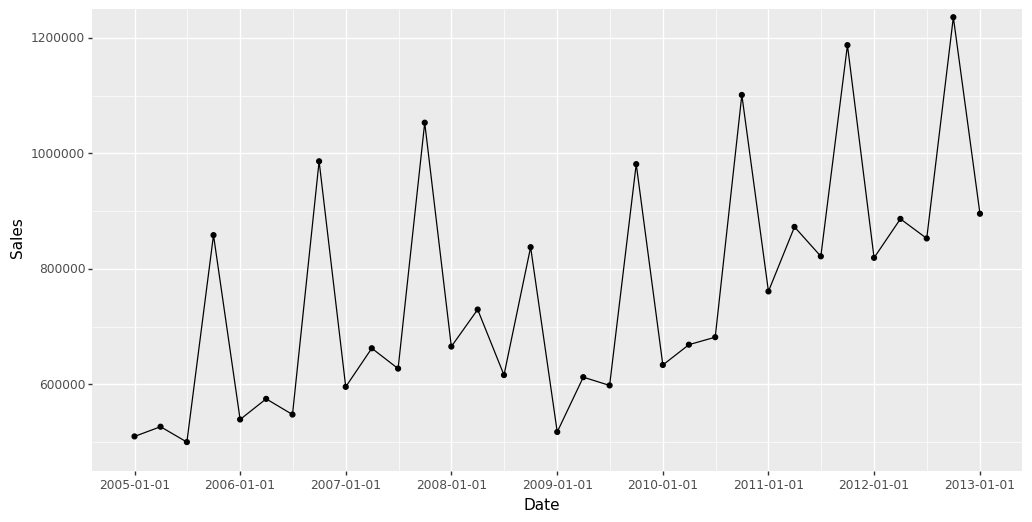

<ggplot: (8767758078043)>

In [ ]:
(
 ggplot(df,aes(x='Date')) +  
 geom_line(aes(y='Sales')) + geom_point(aes(y='Sales')) +
 scale_y_continuous(expand = (0,0),limits = (450000,1250000))+
 theme(figure_size = (12,6))
)

Interpretation:
There is a cyclical pattern. We see that for every year, there is a potential peak in sales. Overall, there was a increasing trend except Year 2008, possibly caused by economic crisis. I think the trend is multiplicative and annual seasonality is additive. 

In [ ]:
train = df.loc[:28,]
test = df.loc[29:,]

In [ ]:
train,test = model_selection.train_test_split(df,test_size=4)

In [ ]:
accuracy = pd.DataFrame(columns=['Training MAPE','Testing MAPE'])

### Model 1

In [ ]:
df['M1'] = df['Sales'].shift(4)
df['Trend'] = list(range(1,len(df)+1))

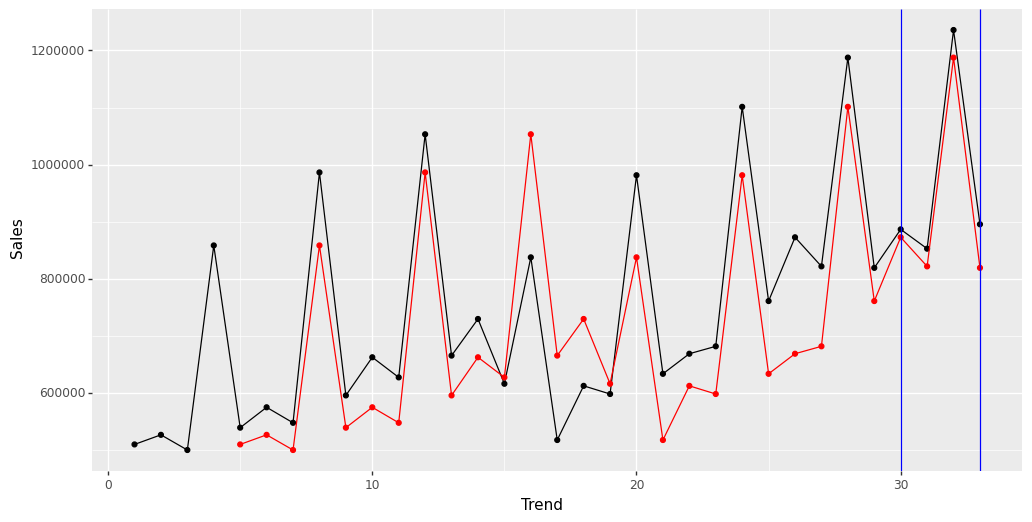

<ggplot: (8767758434067)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M1'), color='red') + geom_line(aes('Trend','M1'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
def mape(actual,predicted):
    return round(abs((actual - predicted)/actual).mean()*100,2)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M1'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M1'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41


In [ ]:
df['M1residuals'] = df['Sales'] - df['M1']

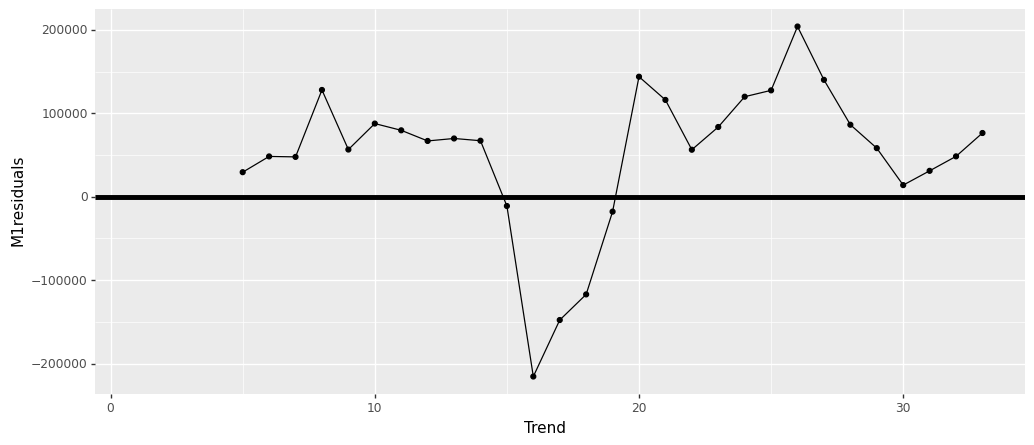

<ggplot: (8767758434139)>

In [ ]:
(
    ggplot(df,aes('Trend','M1residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

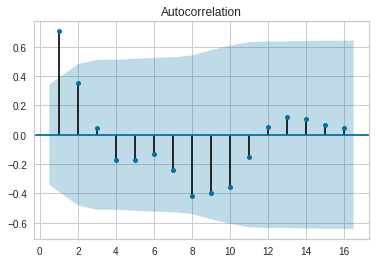

In [ ]:
plot_acf(df['M1residuals'],zero=False,missing='drop',lags=4*4);

I don't think this model is adequate, for the training MAPE is so high. What's more, we can see an obvious trend from the residual plot. And ACF has cyclical component.  


### Model 2

In [ ]:
df['Quarter']=df['Date'].dt.quarter

In [ ]:
M2 = smf.ols('Sales ~ Trend + C(Quarter)',data = df.loc[:28]).fit()
print(M2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     46.34
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           5.99e-11
Time:                        08:46:17   Log-Likelihood:                -361.91
No. Observations:                  29   AIC:                             733.8
Df Residuals:                      24   BIC:                             740.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.771e+05    3.4e+04     

In [ ]:
df['M2'] = M2.predict(df)

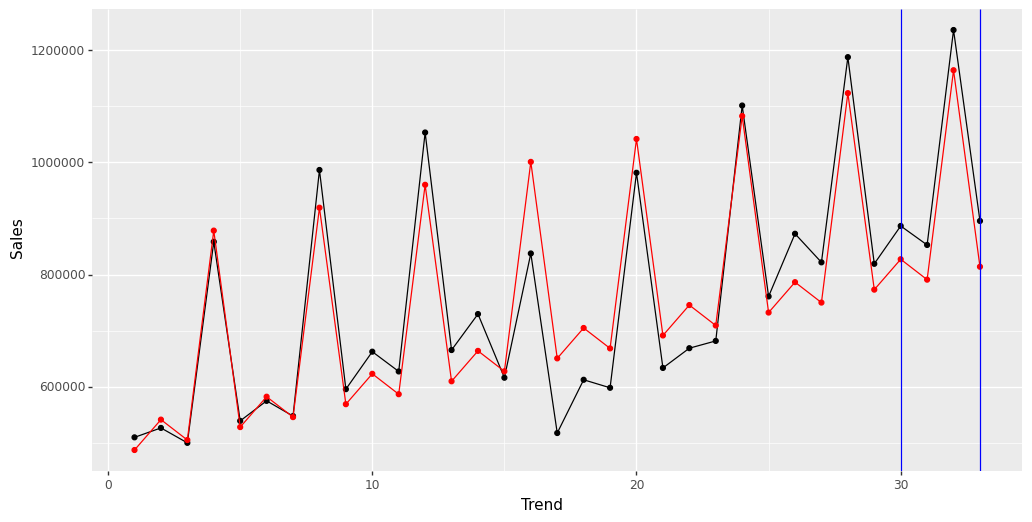

<ggplot: (8767757876071)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M2'), color='red') + geom_line(aes('Trend','M2'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M2'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M2'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21


In [ ]:
M2.pvalues

Intercept          4.653109e-13
C(Quarter)[T.2]    2.368171e-01
C(Quarter)[T.3]    9.425630e-01
C(Quarter)[T.4]    5.459737e-10
Trend              8.910635e-07
dtype: float64

In [ ]:
df['M2residuals'] = df['Sales'] - df['M2']

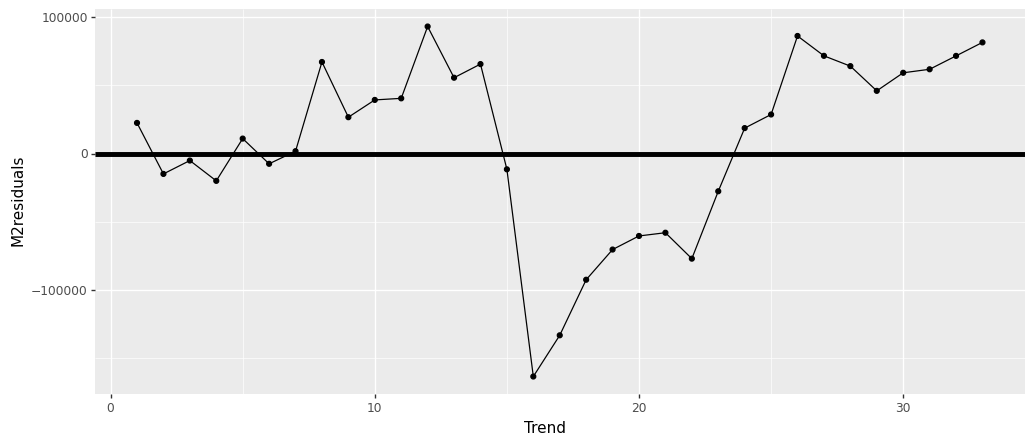

<ggplot: (8767753924895)>

In [ ]:
(
    ggplot(df,aes('Trend','M2residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

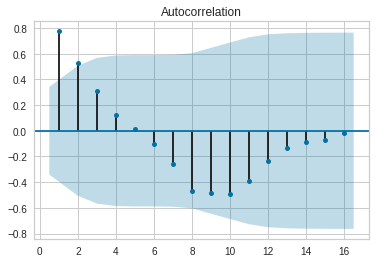

In [ ]:
plot_acf(df['M2residuals'],zero=False,missing='drop',lags=4*4);

I don't think this model adequate. P-values for dummy variables are over 0.05, which isn't significant. And the MAPEs for training and testing sets aren't very low. In addition, residuals of M2 doesn't seem to be random, with systematic patterns. ACF also shows cyclical pattern. 

### Model 3

In [ ]:
df['abrupt'] = 0
df.loc[13:,'abrupt'] = 1

In [ ]:
M3 = smf.ols('Sales ~ Trend + C(Quarter)+ abrupt',data = df.loc[:28]).fit()
print(M3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     70.29
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.65e-13
Time:                        08:46:20   Log-Likelihood:                -352.86
No. Observations:                  29   AIC:                             717.7
Df Residuals:                      23   BIC:                             725.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.292e+05   2.76e+04     

In [ ]:
df['M3'] = M3.predict(df)

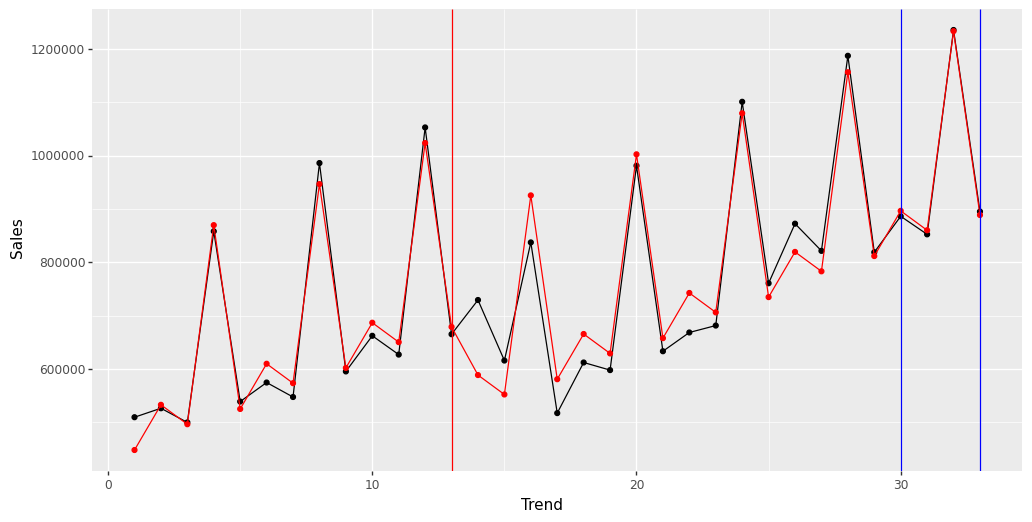

<ggplot: (8767758320839)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M3'), color='red') + geom_line(aes('Trend','M3'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)+
 geom_vline(xintercept = 13, color ='red', size = 0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M3'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M3'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74


In [ ]:
df['M3residuals'] = df['Sales'] - df['M3']

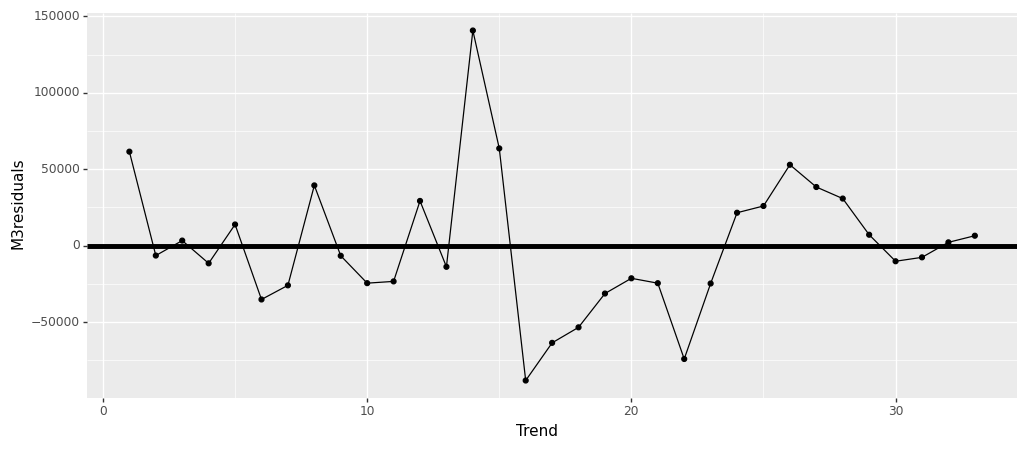

<ggplot: (8767753791070)>

In [ ]:
(
    ggplot(df,aes('Trend','M3residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

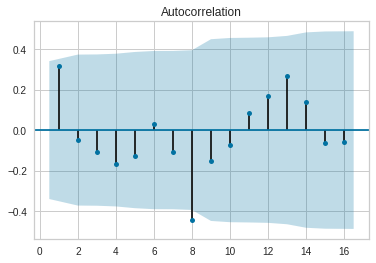

In [ ]:
plot_acf(df['M3residuals'],zero=False,missing='drop',lags=4*4);

I think this model adequate. Although MAPE of training sets in M3 is higher than that in testing sets, both are low and residuals seem to be random, which is also proven in ACF plot.

### Model 4

In [ ]:
df['temporary'] = 0
df.loc[13:17,'temporary'] = 1

In [ ]:
M4 = smf.ols('Sales ~ Trend + C(Quarter)+ temporary',data = df.loc[:28]).fit()
print(M4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     48.05
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.02e-11
Time:                        08:46:23   Log-Likelihood:                -357.97
No. Observations:                  29   AIC:                             727.9
Df Residuals:                      23   BIC:                             736.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.838e+05   3.04e+04     

In [ ]:
df['M4'] = M4.predict(df)

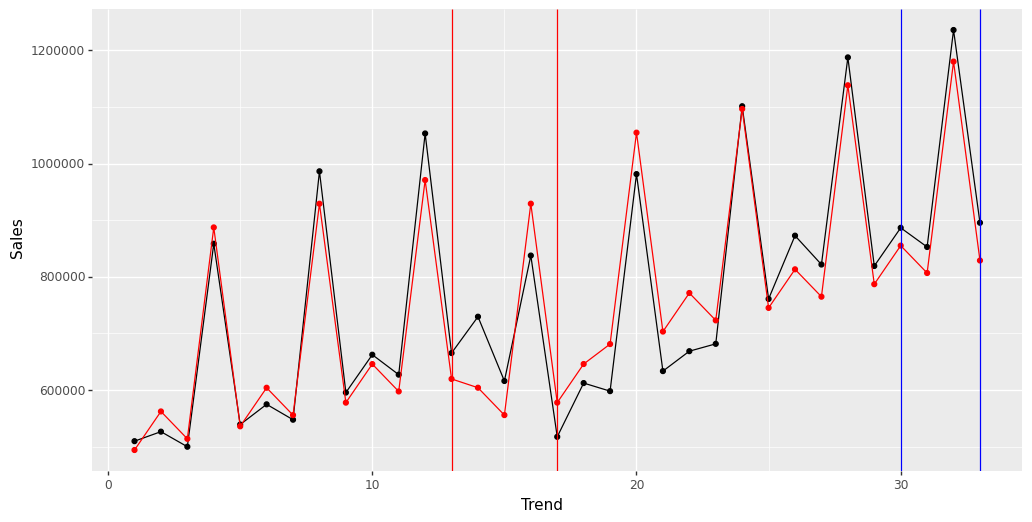

<ggplot: (8767753729259)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M4'), color='red') + geom_line(aes('Trend','M4'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)+
 geom_vline(xintercept = 13, color ='red', size = 0.5) + geom_vline(xintercept = 17, color ='red', size = 0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M4'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M4'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22


In [ ]:
df['M4residuals'] = df['Sales'] - df['M4']

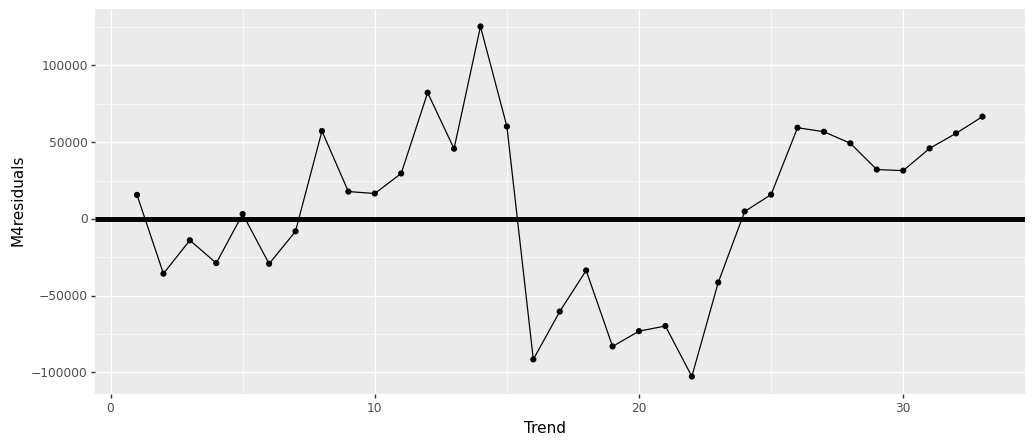

<ggplot: (8767758235335)>

In [ ]:
(
    ggplot(df,aes('Trend','M4residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

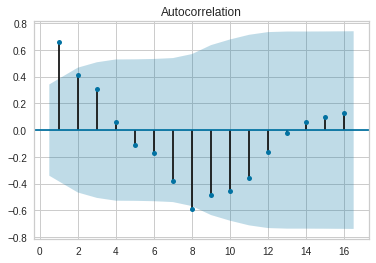

In [ ]:
plot_acf(df['M4residuals'],zero=False,missing='drop',lags=4*4);

I won't consider M4 adequate. The MAPEs have a long way to go. What's more, residuals of M4 seem not to be random, and we can find cyclical component in ACF plot.

### Model 5

In [ ]:
df['ramp'] = 0
df.loc[13:,'ramp'] = list(range(21))[1:]

In [ ]:
M5 = smf.ols('Sales ~ Trend + C(Quarter)+ abrupt + ramp',data = df.loc[:28]).fit()
print(M5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     57.25
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.62e-12
Time:                        08:46:27   Log-Likelihood:                -352.57
No. Observations:                  29   AIC:                             719.1
Df Residuals:                      22   BIC:                             728.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.432e+05   3.49e+04     

In [ ]:
df['M5'] = M5.predict(df)

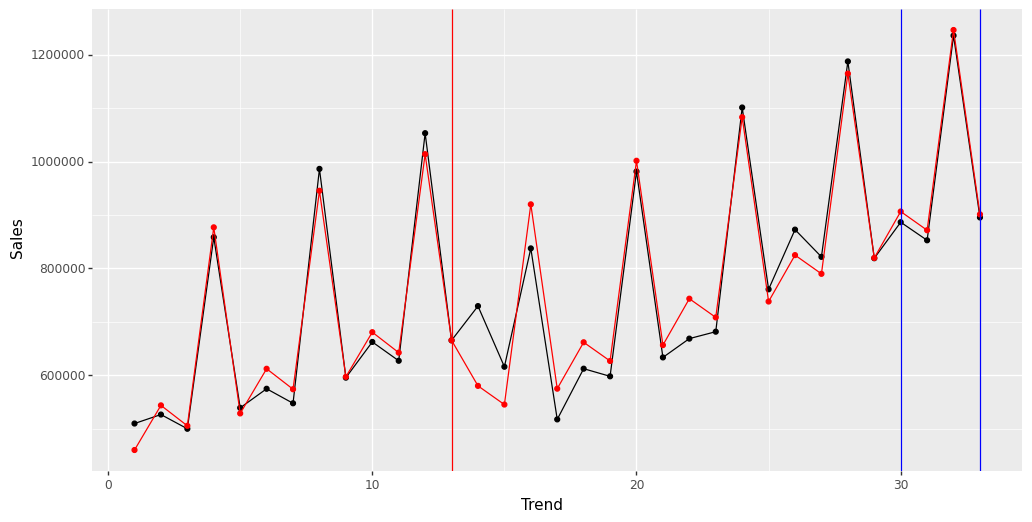

<ggplot: (8767754580438)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M5'), color='red') + geom_line(aes('Trend','M5'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)+
 geom_vline(xintercept = 13, color ='red', size = 0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M5'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M5'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49


In [ ]:
df['M5residuals'] = df['Sales'] - df['M5']

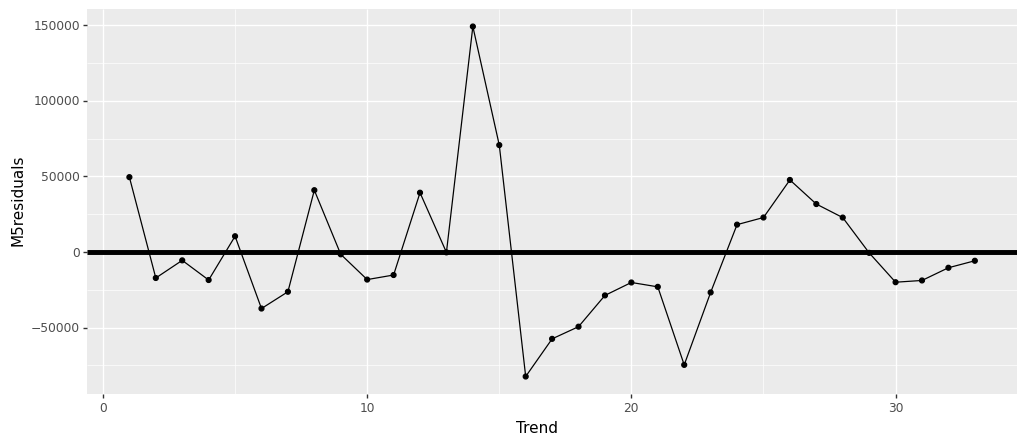

<ggplot: (8767754712031)>

In [ ]:
(
    ggplot(df,aes('Trend','M5residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

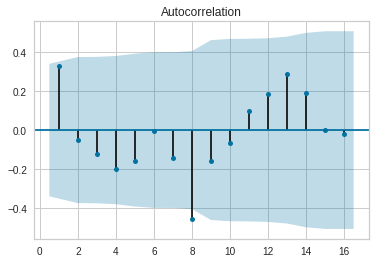

In [ ]:
plot_acf(df['M5residuals'],zero=False,missing='drop',lags=4*4);

I think the model adequate. The residuals are random according to the plot. MAPEs of training and testing data sets are reasonable. ACF plot also shows no cyclical component.

### Model 6

In [ ]:
M6 = smf.ols('Sales ~ Trend + C(Quarter)+ temporary + ramp',data = df.loc[:28]).fit()
print(M6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     38.74
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.33e-10
Time:                        08:46:29   Log-Likelihood:                -357.82
No. Observations:                  29   AIC:                             729.6
Df Residuals:                      22   BIC:                             739.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.714e+05   4.04e+04     

In [ ]:
df['M6'] = M6.predict(df)

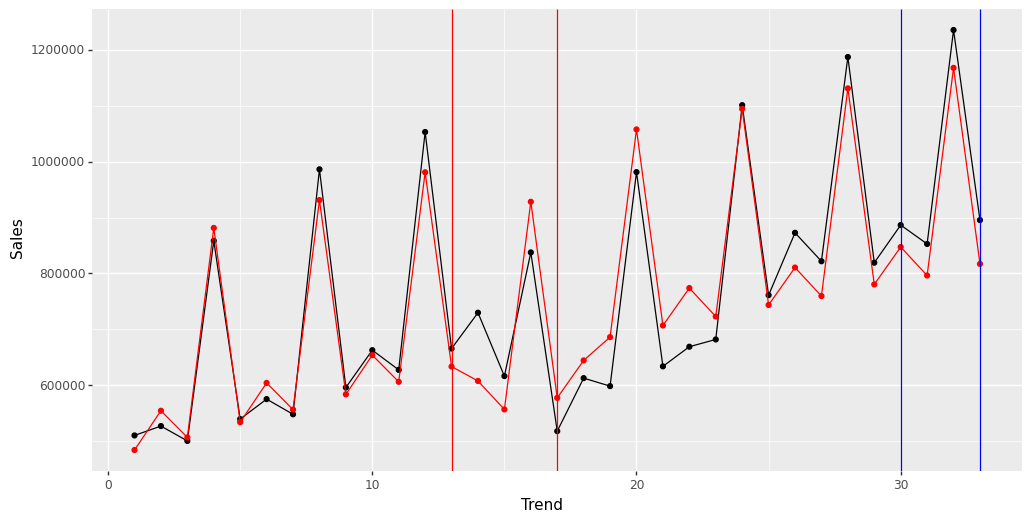

<ggplot: (8767754937245)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M6'), color='red') + geom_line(aes('Trend','M6'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)+
 geom_vline(xintercept = 13, color ='red', size = 0.5) + geom_vline(xintercept = 17, color ='red', size = 0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M6'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M6'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33


In [ ]:
df['M6residuals'] = df['Sales'] - df['M6']

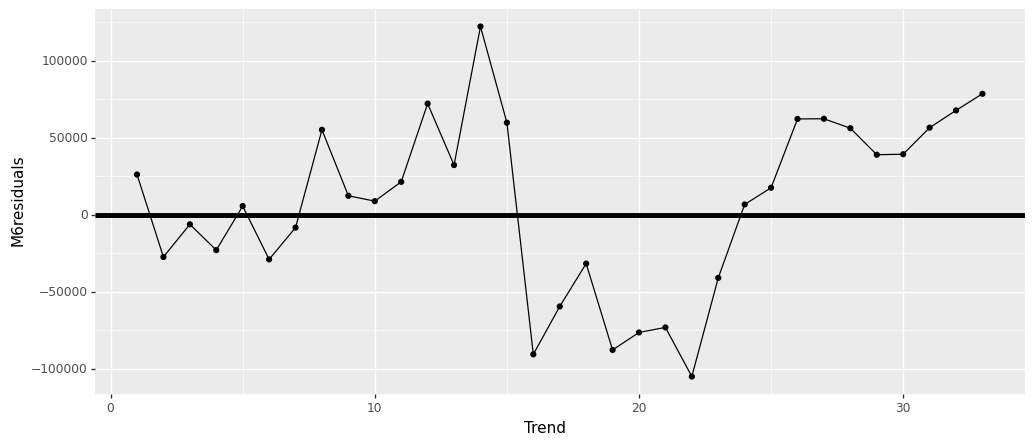

<ggplot: (8767753762082)>

In [ ]:
(
    ggplot(df,aes('Trend','M6residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

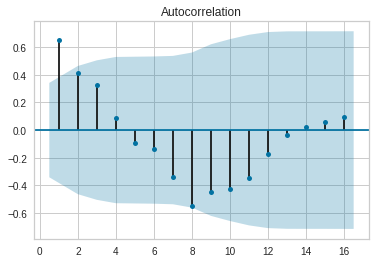

In [ ]:
plot_acf(df['M6residuals'],zero=False,missing='drop',lags=4*4);

I don't think the model adequate, for the MAPEs are really high. Because the residuals have obvious pattern according to the plot. And acf plot also has cyclical component. 

### Model 8

In [ ]:
df['ramp2'] = 0
df.loc[18:,'ramp2'] = list(range(16))[1:]

In [ ]:
M8 = smf.ols('Sales ~ Trend + C(Quarter)+ temporary + ramp + ramp2',data = df.loc[:28]).fit()
print(M8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           7.82e-15
Time:                        08:46:33   Log-Likelihood:                -341.57
No. Observations:                  29   AIC:                             699.1
Df Residuals:                      21   BIC:                             710.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.438e+05    2.4e+04     

In [ ]:
df['M8'] = M8.predict(df)

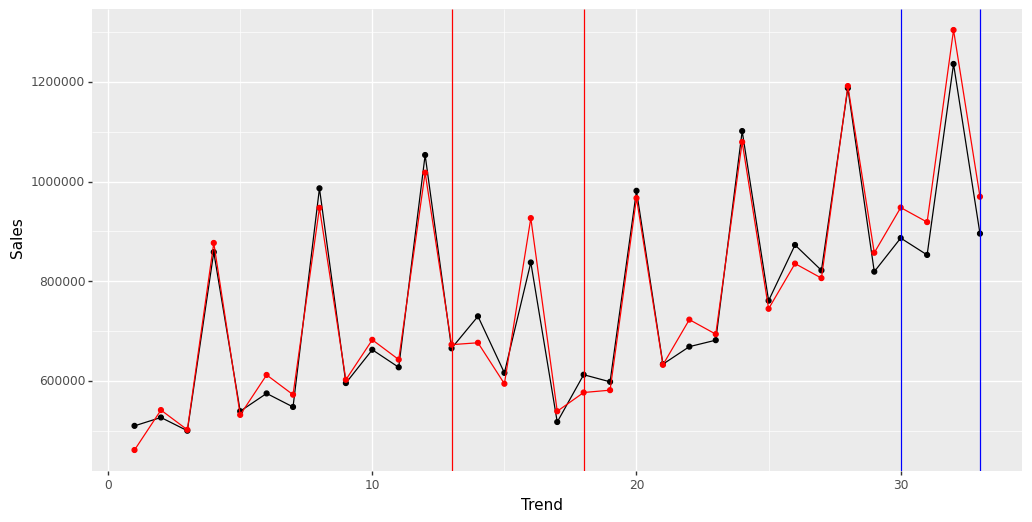

<ggplot: (8767757876176)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M8'), color='red') + geom_line(aes('Trend','M8'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)+
 geom_vline(xintercept = 13, color ='red', size = 0.5) + geom_vline(xintercept = 18, color ='red', size = 0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M8'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M8'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10


In [ ]:
df['M8residuals'] = df['Sales'] - df['M8']

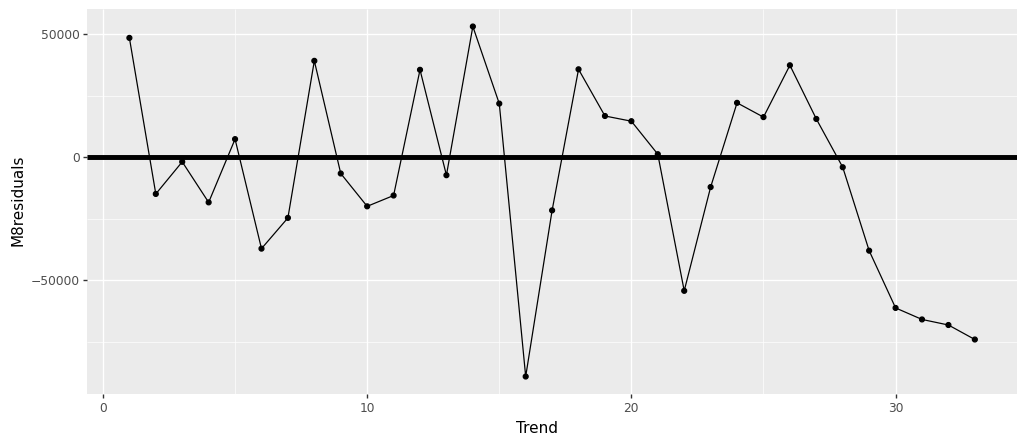

<ggplot: (8767757798060)>

In [ ]:
(
    ggplot(df,aes('Trend','M8residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

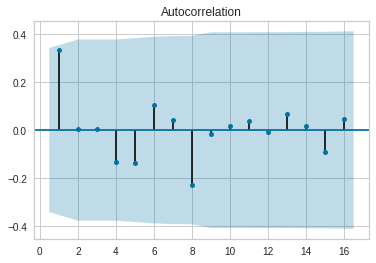

In [ ]:
plot_acf(df['M8residuals'],zero=False,missing='drop',lags=4*4);

We can consider M8 adequate, because the residuals of the model look really random, which is also proven by acf plot. However, MAPE of teasting data is obviously higher than that of training data, which may be considered overfitted.

### Model 9

In [ ]:
M9 = smf.ols('Sales ~ Trend + C(Quarter)+ abrupt + ramp + ramp2',data = df.loc[:28]).fit()
print(M9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     95.77
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.71e-14
Time:                        08:46:35   Log-Likelihood:                -342.65
No. Observations:                  29   AIC:                             701.3
Df Residuals:                      21   BIC:                             712.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.459e+05   2.54e+04     

In [ ]:
df['M9'] = M9.predict(df)

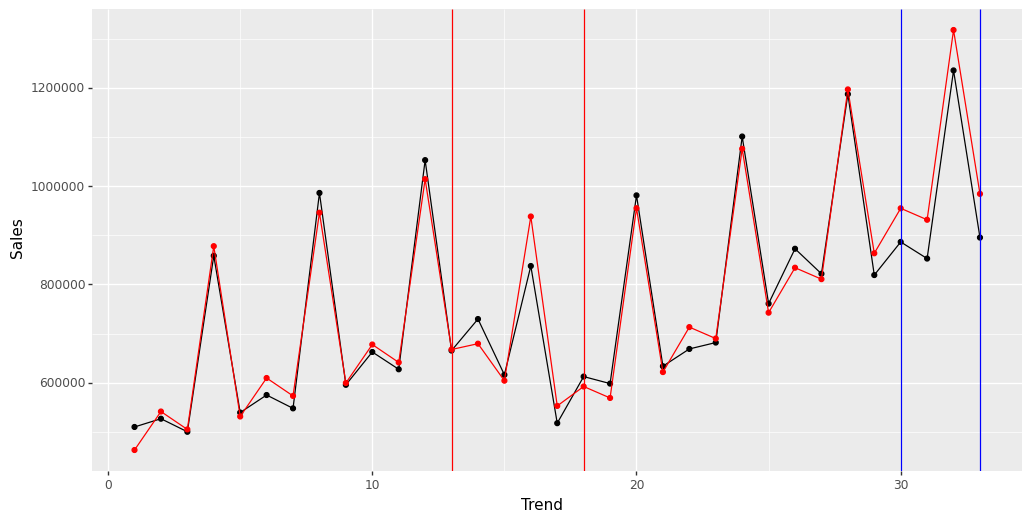

<ggplot: (8767761096744)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M9'), color='red') + geom_line(aes('Trend','M9'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)+
 geom_vline(xintercept = 13, color ='red', size = 0.5) + geom_vline(xintercept = 18, color ='red', size = 0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M9'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M9'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40


In [ ]:
df['M9residuals'] = df['Sales'] - df['M9']

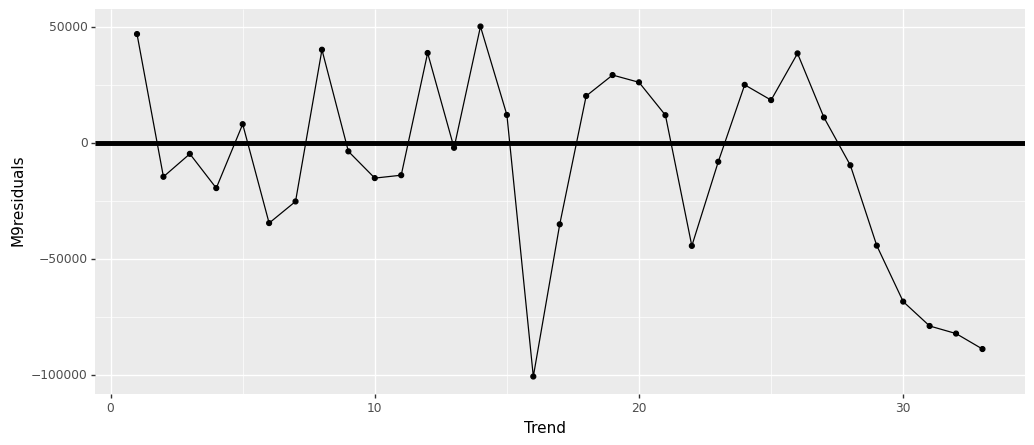

<ggplot: (8767758320668)>

In [ ]:
(
    ggplot(df,aes('Trend','M9residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

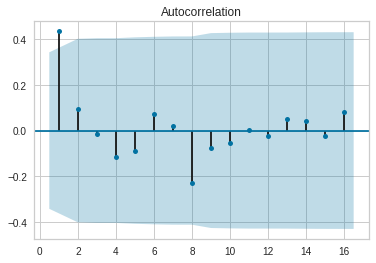

In [ ]:
plot_acf(df['M9residuals'],zero=False,missing='drop',lags=4*4);

The model is adequate, for the residuals are random according to the residual and acf plot. However, MAPE of teasting data is obviously higher than that of training data, which may be considered overfitted. 

### Model 10

In [ ]:
M10 = ExponentialSmoothing(df.loc[:28,'Sales'],trend = 'mul',seasonal='add',seasonal_periods=4).fit()

In [ ]:
df.loc[:(len(df)-4),'M10'] = M10.fittedvalues

In [ ]:
df.loc[29:,'M10'] = M10.forecast(4)

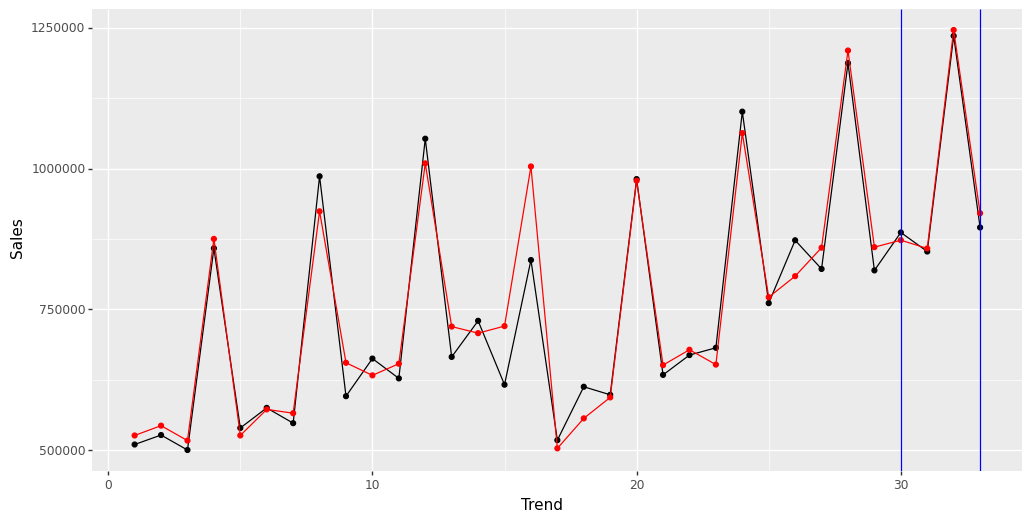

<ggplot: (8767758134519)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M10'), color='red') + geom_line(aes('Trend','M10'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M10'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M10'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46


In [ ]:
df['M10residuals'] = df['Sales'] - df['M10']

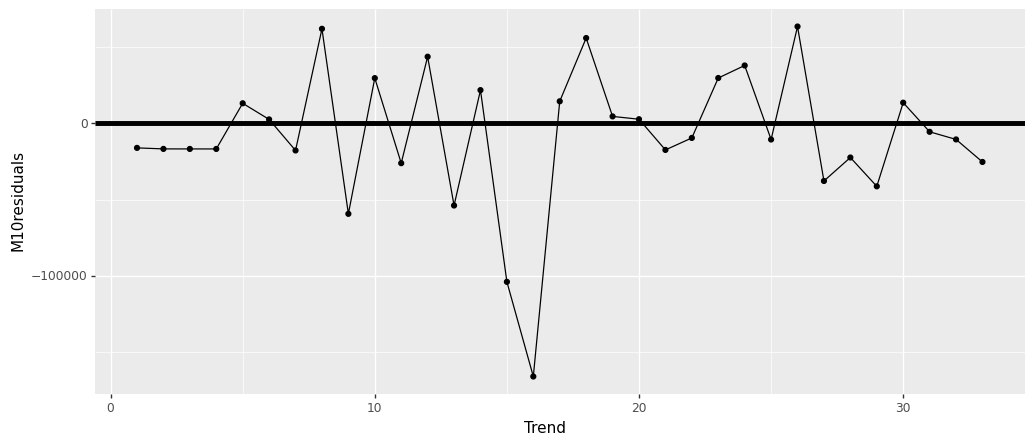

<ggplot: (8767758130896)>

In [ ]:
(
    ggplot(df,aes('Trend','M10residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

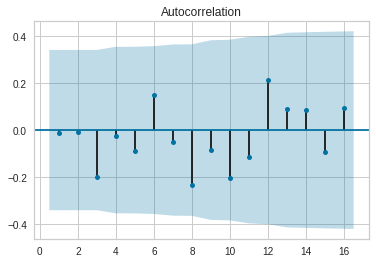

In [ ]:
plot_acf(df['M10residuals'],zero=False,lags=4*4);

Adequate! Random Residuals proven by residual and acf plot. The model also has very good MAPEs! 

### Model 11

In [ ]:
train,test = model_selection.train_test_split(df,test_size=4)

In [ ]:
M11 = pmd.auto_arima(train['Sales'], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=646.708, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=655.384, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=648.460, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=651.914, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=648.687, Time=0.07 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=648.681, Time=0.19 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=650.675, Time=0.21 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=653.386, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=646.478, Time=0.07 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=648.472, Time=0.27 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=649.725, Time=0.39 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=654.305, Time=0.15 sec
 ARIMA(0,0,2)(0,1,0)[4] intercept   : AIC=650.437, Time=0.09 sec
 ARIMA(1,0,2)(0,1,0)[4] intercept   : AIC=653.166, Time=0.55 sec
 ARIMA(0,0,1)(0,1,0)[4]             : AIC=648.8

In [ ]:
print(M11.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   29
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 4)   Log Likelihood                -320.239
Date:                            Fri, 09 Dec 2022   AIC                            646.478
Time:                                    08:46:45   BIC                            650.134
Sample:                                         0   HQIC                           647.492
                                             - 29                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.169e+04    1.8e+04      2.315      0.021    6400.484     7.7e+04
ma.L1          0.1663      0.064   

In [ ]:
predictions , PIs = M11.predict(n_periods = len(test),return_conf_int=True)

In [ ]:
predictions

array([ 916244.96527107,  863456.63136525, 1229129.63136525,
        860859.63136525])

In [ ]:
PIs

array([[ 755100.02387677, 1077389.90666537],
       [ 700099.76253162, 1026813.50019887],
       [1065772.76253162, 1392486.50019887],
       [ 697502.76253162, 1024216.50019887]])

In [ ]:
fittedValues = M11.predict_in_sample(X=train)

In [ ]:
fittedValues

array([  41689.63136525,  117427.89023498,  109672.87670389,
        106590.1083131 ,  676572.09810185,  545558.60890323,
        546679.46330501,  900319.59972758,  595234.36647336,
        616711.86715603,  597098.49097552, 1033068.63728763,
        640758.44216313,  708361.73864408,  672549.27241405,
       1085470.24653605,  665958.55227513,  746660.62598355,
        635535.45876163,  873077.3824671 ,  577311.25619066,
        663538.64507893,  640769.71294037, 1029883.35852689,
        687134.94463202,  722733.1324963 ,  748353.51771288,
       1155110.06315495,  808082.67729188])

In [ ]:
df.loc[:28,'M11'] = fittedValues
df.loc[29:,'M11'] = predictions

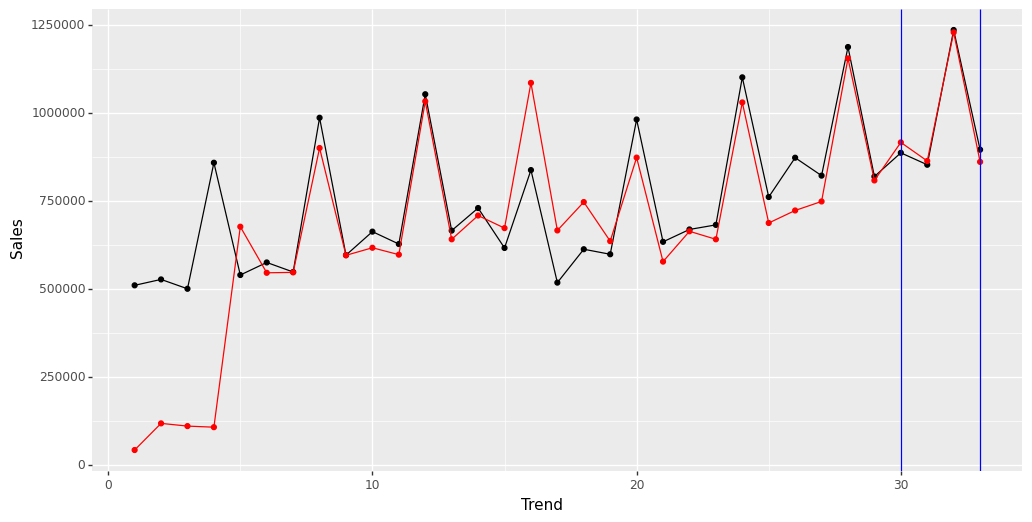

<ggplot: (8767758171498)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M11'), color='red') + geom_line(aes('Trend','M11'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = train['Sales'], predicted = fittedValues)

In [ ]:
testmape = mape(actual = test['Sales'], predicted = predictions)

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46
9,19.44,2.25


In [ ]:
df['M11residuals'] = df['Sales'] - df['M11']

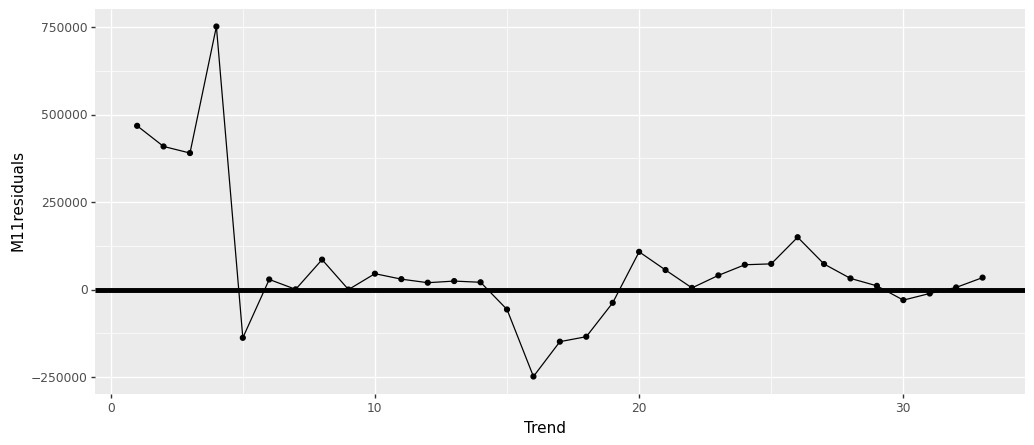

<ggplot: (8767753711888)>

In [ ]:
(
    ggplot(df,aes('Trend','M11residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

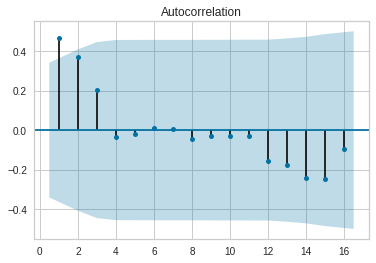

In [ ]:
plot_acf(df['M11residuals'],zero=False,lags=4*4);

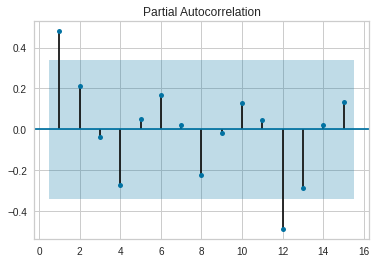

In [ ]:
plot_pacf(df.loc[df['M11residuals'].notna(),'M11residuals'],zero=False,lags=15);

Not adequate! According to the output of M11.summary(), Ljung-Box test is 0.00 < 0.05,  we can conclude that the residuals contain predictable changing patterns that our model did not capture. What's more, we can see systematic pattern in residual plot. 

### Model 12

In [ ]:
dummy = pd.get_dummies(df['Quarter'], prefix='Quarter', prefix_sep='_')
df = pd.concat([df,dummy],axis=1)

In [ ]:
train,test = model_selection.train_test_split(df,test_size=4)

In [ ]:
M12 = pmd.auto_arima(y = train['Sales'], X = train.loc[:,['Trend','Quarter','abrupt']], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=775.679, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=764.870, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=768.461, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=845.815, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=778.922, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=766.598, Time=0.24 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=766.695, Time=0.24 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=769.498, Time=0.33 sec
 ARIMA(1,0,0)(2,0,1)[4] intercept   : AIC=768.598, Time=0.39 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=767.152, Time=0.11 sec
 ARIMA(2,0,0)(1,0,0)[4] intercept   : AIC=759.798, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : AIC=772.863, Time=0.12 sec
 ARIMA(2,0,0)(2,0,0)[4] intercept   : AIC=765.124, Time=0.32 sec
 ARIMA(2,0,0)(1,0,1)[4] intercept   : AIC=765.152, Time=0.25 sec
 ARIMA(2,0,0)(0,0,1)[4] intercept   : AIC=766.3

In [ ]:
print(M12.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   29
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 4)   Log Likelihood                -371.899
Date:                           Fri, 09 Dec 2022   AIC                            759.798
Time:                                   08:46:54   BIC                            770.736
Sample:                                        0   HQIC                           763.224
                                            - 29                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.626e+04   5.76e+04      0.456      0.648   -8.66e+04    1.39e+05
Trend       2.733e+04   9610.887      2.844

In [ ]:
predictions , PIs = M12.predict(X = test.loc[:,['Trend','Quarter','abrupt']],n_periods = len(test),return_conf_int=True)

In [ ]:
predictions

array([ 960611.07830916,  983826.31703883, 1291577.94094576,
        900179.2116955 ])

In [ ]:
PIs

array([[ 753590.71051558, 1167631.44610275],
       [ 765815.53030416, 1201837.10377351],
       [1071109.74908609, 1512046.13280543],
       [ 677795.70345523, 1122562.71993577]])

In [ ]:
fittedValues = M12.predict_in_sample(X = train.loc[:,['Trend','Quarter','abrupt']])

In [ ]:
df.loc[:28,'M12'] = fittedValues
df.loc[29:,'M12'] = predictions

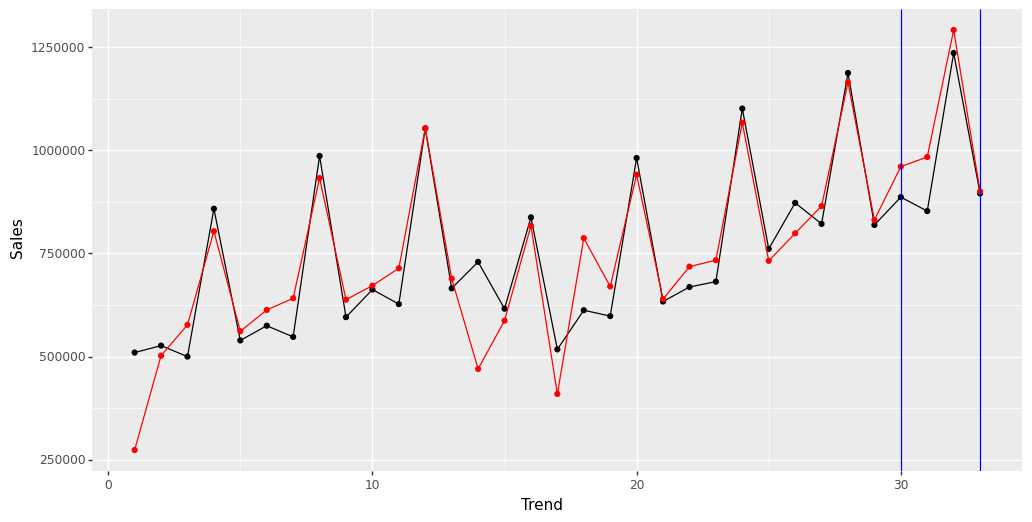

<ggplot: (8767758015537)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M12'), color='red') + geom_line(aes('Trend','M12'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = train['Sales'], predicted = fittedValues)

In [ ]:
testmape = mape(actual = test['Sales'], predicted = predictions)

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46
9,19.44,2.25


In [ ]:
df['M12residuals'] = df['Sales'] - df['M12']

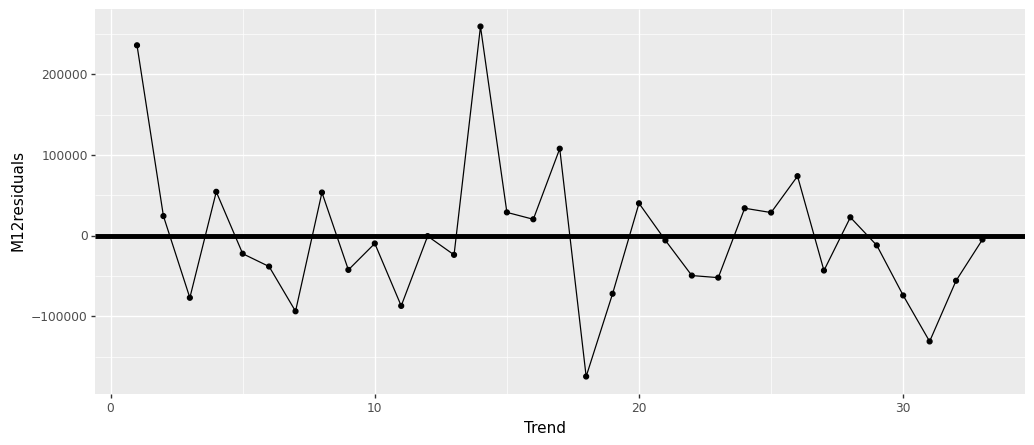

<ggplot: (8767753594173)>

In [ ]:
(
    ggplot(df,aes('Trend','M12residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

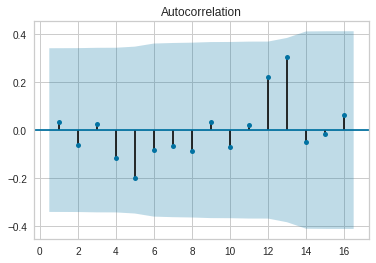

In [ ]:
plot_acf(df['M12residuals'],zero=False,lags=4*4);

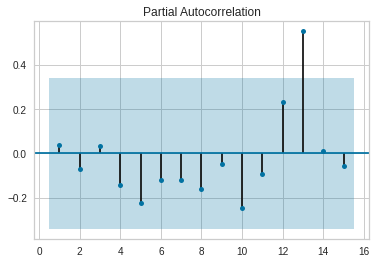

In [ ]:
plot_pacf(df.loc[df['M12residuals'].notna(),'M12residuals'],zero=False,lags=15);

Adequate! According to the output of M12.summary(), Ljung-Box test is 0.80 > 0.05, fail to reject Ho and conclude the model is adequate, because here is no eveidence that the residuals are not independent. In ACF plot, we cannot find cyclical component. We cannot find systematic pattern in residual plot, either. 

### Model 13

In [ ]:
train = train.loc[:,['Sales','CPI','GDP','DPI','Unemp','Interest rate']]
train = train.rename(columns={'Interest rate': 'IR'})

In [ ]:
stuff = ['CPI','GDP','DPI','Unemp','IR']
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
      subset = list(subset)
      if subset == []:
        continue
      else:
        formula="{}~{}".format('Sales',"+".join(subset))
        M=smf.ols(formula=formula,data=train).fit()
        print(M.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 09 Dec 2022   Prob (F-statistic):            0.00363
Time:                        08:46:56   Log-Likelihood:                -388.69
No. Observations:                  29   AIC:                             781.4
Df Residuals:                      27   BIC:                             784.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.302e+06   6.38e+05     -2.041      0.0

In [ ]:
# winners!
M13a = smf.ols('Sales ~ GDP',data=train).fit()
M13b = smf.ols('Sales ~ GDP + DPI',data=train).fit()
M13c = smf.ols('Sales ~ GDP + DPI + CPI',data=train).fit()

In [ ]:
print(M13a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     12.69
Date:                Fri, 09 Dec 2022   Prob (F-statistic):            0.00139
Time:                        08:46:57   Log-Likelihood:                -387.73
No. Observations:                  29   AIC:                             779.5
Df Residuals:                      27   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.223e+06   5.48e+05     -2.231      0.0

In [ ]:
print(M13b.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     7.263
Date:                Fri, 09 Dec 2022   Prob (F-statistic):            0.00312
Time:                        08:46:57   Log-Likelihood:                -386.88
No. Observations:                  29   AIC:                             779.8
Df Residuals:                      26   BIC:                             783.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.965e+06   8.03e+05     -2.446      0.0

In [ ]:
print(M13c.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     5.374
Date:                Fri, 09 Dec 2022   Prob (F-statistic):            0.00539
Time:                        08:46:57   Log-Likelihood:                -386.10
No. Observations:                  29   AIC:                             780.2
Df Residuals:                      25   BIC:                             785.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.403e+06   1.46e+06     -2.330      0.0

Taking adjusted R-squared and AIC into account, I'd like to choose M13c as the winner model.

In [ ]:
M13CPI = pmd.auto_arima(y = train['CPI'], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=123.070, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=125.067, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=122.196, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=130.248, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=120.486, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=122.045, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=120.469, Time=0.33 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=120.907, Time=0.42 sec
 ARIMA(0,1,1)(1,0,2)[4] intercept   : AIC=120.469, Time=0.46 sec
 ARIMA(0,1,1)(0,0,2)[4] intercept   : AIC=122.293, Time=0.09 sec
 ARIMA(0,1,1)(2,0,2)[4] intercept   : AIC=123.253, Time=0.51 sec
 ARIMA(0,1,0)(1,0,2)[4] intercept   : AIC=122.296, Time=0.46 sec
 ARIMA(1,1,1)(1,0,2)[4] intercept   : AIC=120.554, Time=0.46 sec
 ARIMA(0,1,2)(1,0,2)[4] intercept   : AIC=120.016, Time=0.56 sec
 ARIMA(0,1,2)(0,0,2)[4] intercept   : AIC=119.7

In [ ]:
predictions , PIs = M13CPI.predict(X = test,n_periods = len(test),return_conf_int=True)

In [ ]:
df['CPIARIMA'] = df['CPI']
df.loc[29:,'CPIARIMA'] = predictions

In [ ]:
M13GDP = pmd.auto_arima(y = train['GDP'], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=352.826, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=346.172, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=349.248, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=368.513, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=344.207, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=346.166, Time=0.10 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[4] intercept   : AIC=345.962, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=345.989, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=347.482, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=347.941, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[4]             : AIC=346.042, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[4] intercept
Total fit time: 1.312 seconds


In [ ]:
predictions , PIs = M13GDP.predict(X = test,n_periods = len(test),return_conf_int=True)

In [ ]:
df['GDPARIMA'] = df['GDP']
df.loc[29:,'GDPARIMA'] = predictions

In [ ]:
M13DPI = pmd.auto_arima(y = train['DPI'], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=343.212, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=343.519, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=343.456, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=360.654, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=343.042, Time=0.10 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=344.593, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=344.752, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=342.753, Time=0.06 sec
 ARIMA(0,1,0)(0,0,2)[4] intercept   : AIC=344.752, Time=0.13 sec
 ARIMA(0,1,0)(1,0,2)[4] intercept   : AIC=346.752, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=343.075, Time=0.14 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=345.040, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[4]             : AIC=353.752, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,1)[4] intercept
Total fit time: 1.484 seconds


In [ ]:
predictions , PIs = M13DPI.predict(X = test,n_periods = len(test),return_conf_int=True)

In [ ]:
df['DPIARIMA'] = df['DPI']
df.loc[29:,'DPIARIMA'] = predictions

In [ ]:
M13Unemp = pmd.auto_arima(y = train['Unemp'], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=35.957, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=16.002, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=24.482, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=35.585, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=14.188, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=15.827, Time=0.09 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[4] intercept   : AIC=16.187, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=16.187, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=23.818, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=18.148, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[4]             : AIC=12.208, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4]             : AIC=14.018, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[4]             : AIC=13.846, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[4]             : AIC=inf, Time=0.30 sec
 AR

In [ ]:
predictions , PIs = M13Unemp.predict(X = test,n_periods = len(test),return_conf_int=True)

In [ ]:
df['UnempARIMA'] = df['Unemp']
df.loc[29:,'UnempARIMA'] = predictions

In [ ]:
M13Interest = pmd.auto_arima(y = train['IR'], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=42.932, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=32.760, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=32.752, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=41.781, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=31.874, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=32.983, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=34.735, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=33.313, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=33.579, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=31.479, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=32.693, Time=0.19 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=34.692, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[4] intercept   : AIC=33.463, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=33.720, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[4]             : AIC=29.556, Time=0.03 s

In [ ]:
predictions , PIs = M13Interest.predict(X = test,n_periods = len(test),return_conf_int=True)

In [ ]:
df['InterestARIMA'] = df['Interest rate']
df.loc[29:,'InterestARIMA'] = predictions

In [ ]:
df13 = df
df13['GDP']=df['GDPARIMA']
df13['DPI']=df['DPIARIMA']
df13['CPI']=df['CPIARIMA']

In [ ]:
df['M13'] = M13c.predict(df13.loc[:,['GDP','DPI','CPI']])

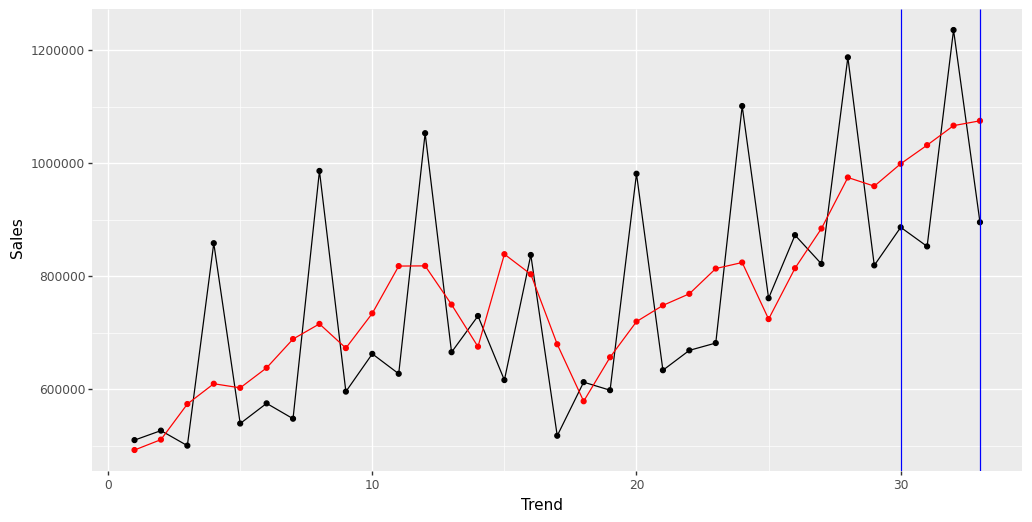

<ggplot: (8767754204052)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M13'), color='red') + geom_line(aes('Trend','M13'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M13'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M13'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46
9,19.44,2.25


In [ ]:
df['M13residuals'] = df['Sales'] - df['M13']

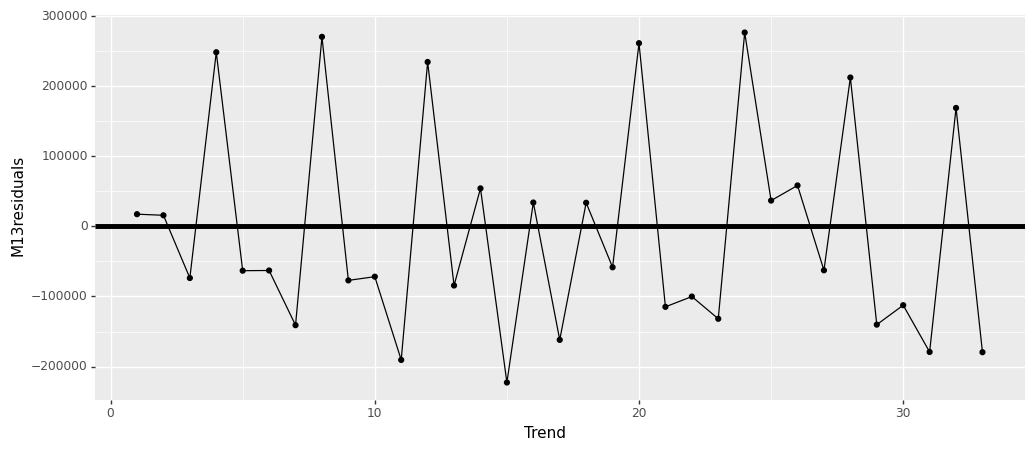

<ggplot: (8767757679183)>

In [ ]:
(
    ggplot(df,aes('Trend','M13residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

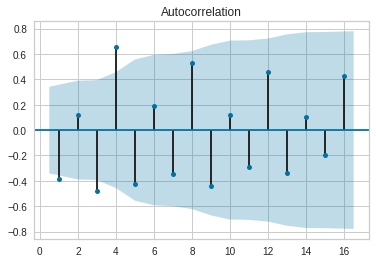

In [ ]:
plot_acf(df['M13residuals'],zero=False,lags=4*4);

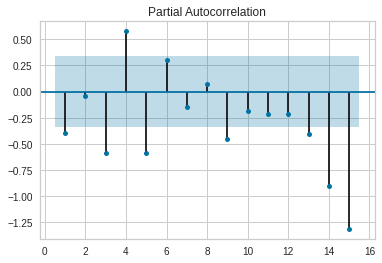

In [ ]:
plot_pacf(df.loc[df['M13residuals'].notna(),'M13residuals'],zero=False,lags=15);

Adequat! residual plot no systematic pattern, acf no spikes and cyclical component. 

### Model 14

In [ ]:
train,test = model_selection.train_test_split(df,test_size=4)

In [ ]:
M14 = pmd.auto_arima(y = train['Sales'], X = train.loc[:,['GDP','DPI','CPI']], start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=2, max_Q=2, max_order=10, m=4,seasonal = True,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,2,0)[4]             : AIC=581.414, Time=0.07 sec
 ARIMA(1,0,0)(1,2,0)[4]             : AIC=538.989, Time=1.36 sec
 ARIMA(0,0,1)(0,2,1)[4]             : AIC=536.561, Time=0.94 sec
 ARIMA(0,0,1)(0,2,0)[4]             : AIC=539.440, Time=0.30 sec
 ARIMA(0,0,1)(1,2,1)[4]             : AIC=536.665, Time=2.16 sec
 ARIMA(0,0,1)(0,2,2)[4]             : AIC=535.944, Time=2.24 sec
 ARIMA(0,0,1)(1,2,2)[4]             : AIC=537.757, Time=4.40 sec
 ARIMA(0,0,0)(0,2,2)[4]             : AIC=533.506, Time=3.10 sec
 ARIMA(0,0,0)(0,2,1)[4]             : AIC=534.980, Time=1.51 sec
 ARIMA(0,0,0)(1,2,2)[4]             : AIC=535.563, Time=4.41 sec
 ARIMA(0,0,0)(1,2,1)[4]             : AIC=inf, Time=1.47 sec
 ARIMA(1,0,0)(0,2,2)[4]             : AIC=534.998, Time=1.82 sec
 ARIMA(1,0,1)(0,2,2)[4]             : AIC=537.280, Time=2.59 sec
 ARIMA(0,0,0)(0,2,2)[4] intercept   : AIC=536.973, Time=1.93 sec

Best model:  ARIMA(0,0,0)(0,2,2)[4]          
Tota

In [ ]:
print(M14.summary())

                                  SARIMAX Results                                   
Dep. Variable:                            y   No. Observations:                   29
Model:             SARIMAX(0, 2, [1, 2], 4)   Log Likelihood                -260.753
Date:                      Fri, 09 Dec 2022   AIC                            533.506
Time:                              08:47:15   BIC                            539.773
Sample:                                   0   HQIC                           534.866
                                       - 29                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GDP          181.8826     92.072      1.975      0.048       1.426     362.340
DPI          200.5588    194.503      1.031      0.302    -180.660     581.778
CPI 

In [ ]:
predictions , PIs = M14.predict(X = df13.loc[29:,['GDP','DPI','CPI']],n_periods = len(test),return_conf_int=True)

In [ ]:
predictions

array([1031459.41366211, 1023918.87827815, 1393228.87717201,
        896599.20922601])

In [ ]:
PIs

array([[ 900166.21752973, 1162752.6097945 ],
       [ 892625.68214577, 1155212.07441054],
       [1261935.68103962, 1524522.07330439],
       [ 765661.08328839, 1027537.33516362]])

In [ ]:
fittedValues = M14.predict_in_sample(X = train.loc[:,['GDP','DPI','CPI']])

In [ ]:
df.loc[:28,'M14'] = fittedValues
df.loc[29:,'M14'] = predictions

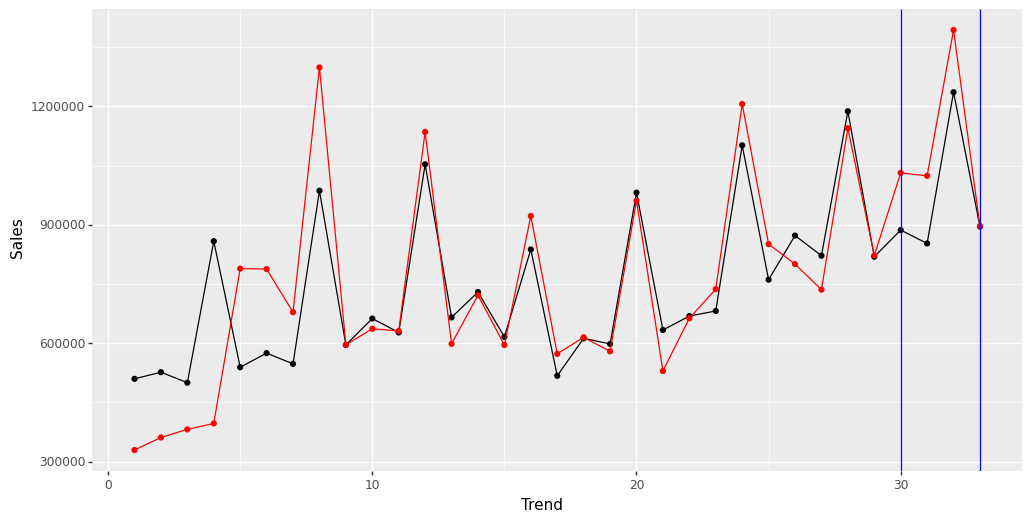

<ggplot: (8767753777902)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M14'), color='red') + geom_line(aes('Trend','M14'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = train['Sales'], predicted = fittedValues)

In [ ]:
testmape = mape(actual = test['Sales'], predicted = predictions)

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46
9,19.44,2.25


In [ ]:
df['M14residuals'] = df['Sales'] - df['M14']

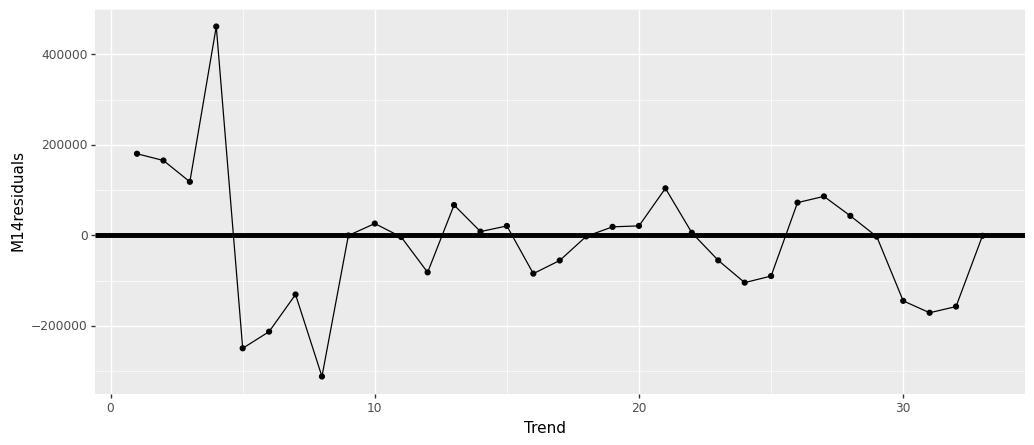

<ggplot: (8767758049558)>

In [ ]:
(
    ggplot(df,aes('Trend','M14residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

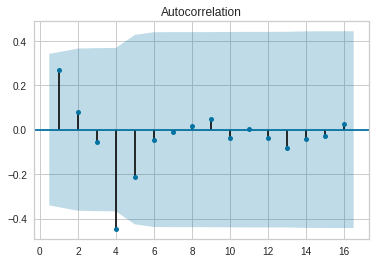

In [ ]:
plot_acf(df['M14residuals'],zero=False,lags=4*4);

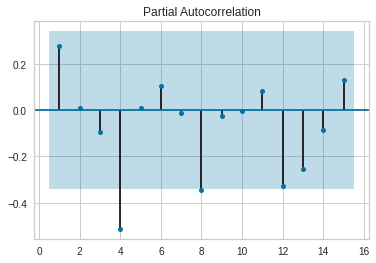

In [ ]:
plot_pacf(df.loc[df['M14residuals'].notna(),'M14residuals'],zero=False,lags=15);

Adequate! Because we cann't find cyclical component in ACF plot,and Ljung-Box is 0.16 > 0.05 meaning residuals are random, which is also shown in residual plot!

### Model 15

In [ ]:
df.set_index('Date',inplace=True)
df15 = df.loc[:,['Sales','CPI','GDP','DPI','Unemp','Interest rate','Trend','Quarter_1','Quarter_2','Quarter_3','Quarter_4']]

In [ ]:
s = setup(df15['Sales'],fold = 2,fh = 4,session_id = 123,n_jobs=1)

,Description,Value
0,session_id,123
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(33, 1)"
5,Transformed data shape,"(33, 1)"
6,Transformed train set shape,"(29, 1)"
7,Transformed test set shape,"(4, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
s.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [ ]:
s.get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mase,MASE,MASE,<function mase at 0x7f967735b940>,"make_scorer(mase, greater_is_better=False)",pred,{},False,False
rmsse,RMSSE,RMSSE,<function rmsse at 0x7f9677363280>,"make_scorer(rmsse, greater_is_better=False)",pred,{},False,False
mae,MAE,MAE,<function mean_absolute_error at 0x7f9682966b80>,neg_mean_absolute_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f9682a69940>,neg_root_mean_squared_error,pred,{'squared': False},False,False
mape,MAPE,MAPE,<function mape at 0x7f967734b160>,"make_scorer(mape, greater_is_better=False)",pred,{},False,False
smape,SMAPE,SMAPE,<function _smape_loss at 0x7f9677343ee0>,"make_scorer(_smape_loss, greater_is_better=False)",pred,{},False,False
r2,R2,R2,<function r2_score at 0x7f9682a69ca0>,r2,pred,{},True,False


In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,33.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,756326.30303
3,Summary,Statistics,Transformed,Median,,681729.0
4,Summary,Statistics,Transformed,Standard Deviation,,203425.955704
5,Summary,Statistics,Transformed,Variance,,41382119454.030296
6,Summary,Statistics,Transformed,Kurtosis,,-0.268549
7,Summary,Statistics,Transformed,Skewness,,0.740253
8,Summary,Statistics,Transformed,# Distinct Values,,33.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",71.938637


In [ ]:
plot_model()

In [ ]:
M15 = compare_models(fold = 2,errors="raise")

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.4696,0.5417,40585.0444,54145.7618,0.0436,0.0424,0.8838,0.1100
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.5869,0.5388,50892.4949,53868.0758,0.0585,0.0602,0.8749,0.1950
theta,Theta Forecaster,0.6339,0.5929,54671.1380,59251.4299,0.0648,0.0669,0.8704,0.0650
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6733,0.6020,58395.5963,60190.1069,0.0699,0.0719,0.8362,0.1600
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6818,0.6208,59235.3926,62077.2616,0.0678,0.0705,0.8139,0.2250
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6964,0.6404,60534.5574,64038.9716,0.0715,0.0749,0.7825,0.1150
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.7258,0.6493,62933.4068,64910.7043,0.0714,0.0740,0.8152,0.1000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.7923,0.7247,68512.3114,72431.0240,0.0788,0.0822,0.8001,0.0950
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.8092,0.8100,70316.9686,81001.4432,0.0833,0.0897,0.6526,0.1650
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8387,0.7707,72510.1872,77035.0043,0.0835,0.0873,0.7755,0.1400


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:
# champion
M15

ExponentialSmoothing(seasonal='mul', sp=4, trend='add')

In [ ]:
M15.get_params()

{'damped_trend': False,
 'damping_trend': None,
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'method': None,
 'minimize_kwargs': None,
 'optimized': True,
 'random_state': None,
 'remove_bias': False,
 'seasonal': 'mul',
 'smoothing_level': None,
 'smoothing_seasonal': None,
 'smoothing_trend': None,
 'sp': 4,
 'start_params': None,
 'trend': 'add',
 'use_boxcox': None,
 'use_brute': True}

In [ ]:
plot_model(plot='train_test_split')

In [ ]:
predict_model(M15)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,0.4655,0.6009,43292.9942,63844.9649,0.0390,0.0379,0.8317


,y_pred
2012Q2,8.986036e+05
2012Q3,8.415687e+05
2012Q4,1.359692e+06
2013Q1,8.694417e+05


In [ ]:
plot_model(M15,plot='forecast')

In [ ]:
plot_model(M15,plot='insample')

In [ ]:
plot_model(M15,plot='residuals')

In [ ]:
plot_model(M15,plot='diagnostics')

In [ ]:
M_tuned = tune_model(M15)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2010Q1,0.4959,0.4628,42296.9599,46206.2034,0.0521,0.0528,0.9308
1,2011Q1,0.3032,0.3347,26525.0091,33482.7162,0.0300,0.0295,0.9520
Mean,NaT,0.3996,0.3987,34410.9845,39844.4598,0.0410,0.0412,0.9414
SD,NaT,0.0963,0.0641,7885.9754,6361.7436,0.0110,0.0117,0.0106


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.7s finished


In [ ]:
df15.reset_index(inplace=True)

In [ ]:
M_tuned

ExponentialSmoothing(seasonal='additive', sp=4, trend='mul', use_boxcox=False)

In [ ]:
M15 = ExponentialSmoothing(df15.loc[:28,'Sales'],trend = 'mul',seasonal='additive',seasonal_periods=4).fit()

In [ ]:
M15.fittedvalues

0     5.259324e+05
1     5.433943e+05
2     5.168241e+05
3     8.751645e+05
4     5.259709e+05
5     5.722540e+05
6     5.655022e+05
7     9.241147e+05
8     6.550978e+05
9     6.327431e+05
10    6.534056e+05
11    1.009267e+06
12    7.193867e+05
13    7.077020e+05
14    7.202220e+05
15    1.003882e+06
16    5.030233e+05
17    5.563401e+05
18    5.935621e+05
19    9.785755e+05
20    6.509479e+05
21    6.782469e+05
22    6.518372e+05
23    1.063092e+06
24    7.715497e+05
25    8.089749e+05
26    8.595532e+05
27    1.209796e+06
28    8.604660e+05
dtype: float64

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.loc[:28,'M15'] = M15.fittedvalues

In [ ]:
df.loc[29:,'M15'] = M15.forecast(4)

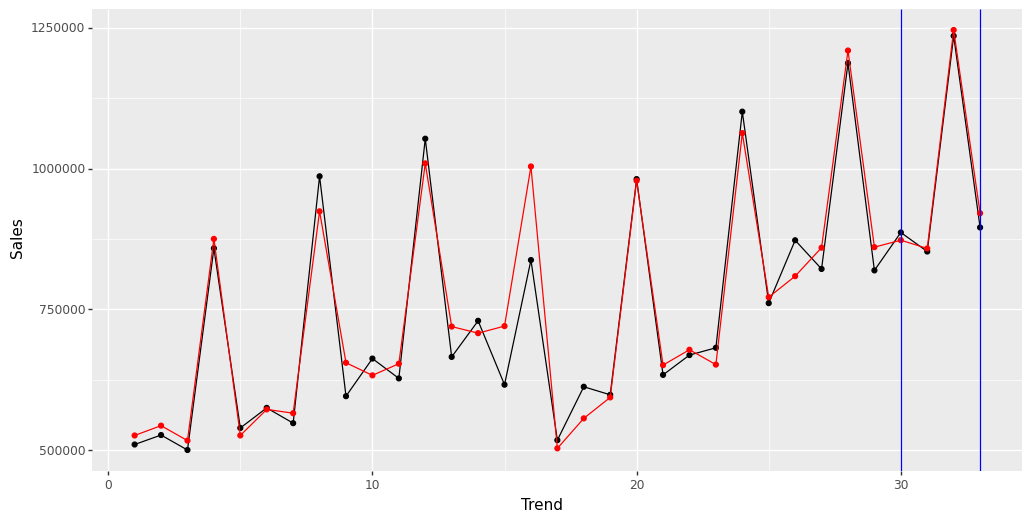

<ggplot: (8767753859100)>

In [ ]:
(
    ggplot(df,aes('Trend','Sales')) + geom_point() + geom_line() +
 geom_point(aes('Trend','M15'), color='red') + geom_line(aes('Trend','M15'),color='red') + theme(figure_size = (12,6))+
 geom_vline(xintercept = 30, color ='blue', size = 0.5) + geom_vline(xintercept = 33, color='blue',size=0.5)
)

In [ ]:
trainmape = mape(actual = df.loc[:28,'Sales'], predicted = df.loc[:28,'M15'])

In [ ]:
testmape = mape(actual = df.loc[29:,'Sales'], predicted = df.loc[29:,'M15'])

In [ ]:
accuracy.loc[len(accuracy)]=[trainmape,testmape]
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46
9,19.44,2.25


In [ ]:
df['M15residuals'] = df['Sales'] - df['M15']

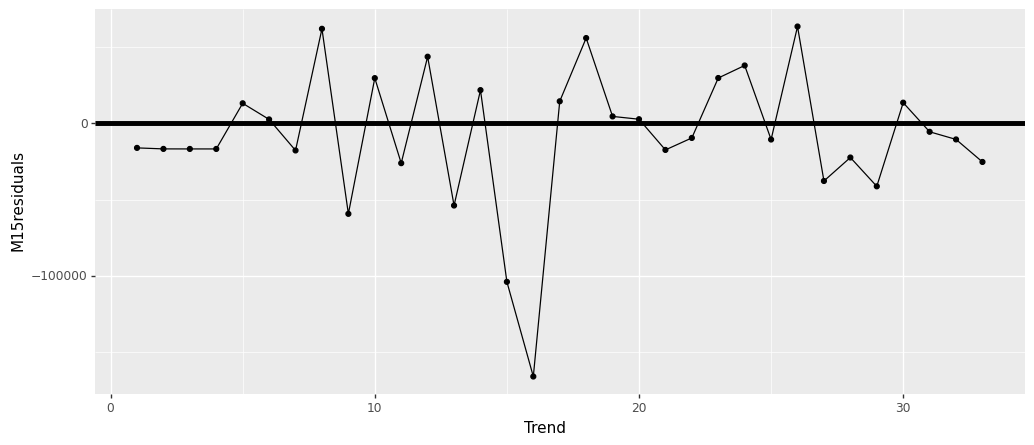

<ggplot: (8767753649186)>

In [ ]:
(
    ggplot(df,aes('Trend','M15residuals')) + geom_point() + geom_line() + theme(figure_size = (12,5))+
 geom_hline(yintercept=0, size=2)
)

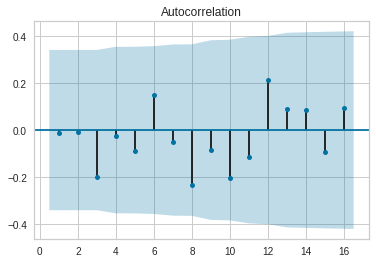

In [ ]:
plot_acf(df['M15residuals'],zero=False,lags=4*4);

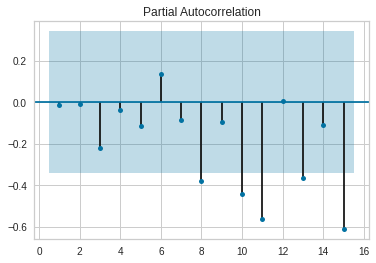

In [463]:
plot_pacf(df.loc[df['M15residuals'].notna(),'M15residuals'],zero=False,lags=15);

Adequate! From the residual plot, we can see the residuals are randomly distributed. ACF plot also has no cyclical component. 

## Write a brief report summarizing different models you created. Formulate the best practices for forecasting model building.

In [464]:
accuracy

,Training MAPE,Testing MAPE
0,12.45,4.41
1,7.03,7.21
2,5.27,0.74
3,6.45,5.22
4,5.01,1.49
5,6.30,6.33
6,3.56,7.10
7,3.64,8.40
8,4.83,1.46
9,19.44,2.25


1.   From all of the 14 models I created before, we can see that although we can find similar patterns between exogenous macroeconomic variables and sales data, exogenous macroeconomic variables are still not good predictors for sales data. This may because we need to use their predictions to predict future sales, which may cause error accumulation. 

2.   From M1-M9, we find the best model is M3. M5 derives from M3 but worse than M3, which means complicated models may not have better prediction. According to the MAPE in testing sets, M3 even has a better prediction than champion model M15, that's because we can remove underperforming variablesvariables from the model manually. 

3. And the best model of the 14 models I created above is M15, which is not only adequate but also has low and similar MAPEs in training and testing data sets. 

## 21. 

It is really wonderful and efficient to work with my teammates. All of them are iintelligent and hardworking. In each homework, we go through every model together, debuging our code. I'm really grateful that our team struggled 5 hours together till 2:30 am to finish the HW3 before Thanksgiving holiday began. The whole teamwork is really wonderful!!

## 22. 

I think I deserve A in this class, for I have learned so much about the regressions which can be used in future career. And my midterm and HW grades are also top in the class (I guess). 